In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz 
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
!wget https://www.dropbox.com/s/jh8e8mo5x4dg4ia/USvideos.csv #https://www.dropbox.com/s/i6heazqtoo26rvm/youtube_videos.csv

--2020-03-11 08:56:11--  https://www.dropbox.com/s/jh8e8mo5x4dg4ia/USvideos.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jh8e8mo5x4dg4ia/USvideos.csv [following]
--2020-03-11 08:56:11--  https://www.dropbox.com/s/raw/jh8e8mo5x4dg4ia/USvideos.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2097905c32894d63bc6108bc29.dl.dropboxusercontent.com/cd/0/inline/AzsSdE9SaOIcz1j0fFDTdxT5-5p38XJMfbgF4O6H3sWc48_gn2xRyvCEXouylaeo4NzZEsVylW4d4QGNZuoupc3tVifSW3EinH5CI_NaSQlBN8atfVPIw0AjHYeQU2bgcio/file# [following]
--2020-03-11 08:56:12--  https://uc2097905c32894d63bc6108bc29.dl.dropboxusercontent.com/cd/0/inline/AzsSdE9SaOIcz1j0fFDTdxT5-5p38XJMfbgF4O6H3sWc48_gn2xRyvCEXouylaeo4NzZEsVylW4d4QGNZuoupc3tVifSW3EinH5CI_NaSQlBN8a

In [0]:
from pyspark.sql.types import *

youtube_schema=StructType([
    StructField("video_id", StringType(), True),
    StructField("trending_date", StringType(), True),
    StructField("title", StringType(), True),
    StructField("channel_title", StringType(), True),
    StructField("category_id", IntegerType(), True),
    StructField("publish_time", StringType(), True),
    StructField("tags", StringType(), True),
    StructField("views", IntegerType(), True),
    StructField("likes", IntegerType(), True),
    StructField("dislikes", IntegerType(), True),
    StructField("comment_count", IntegerType(), True),
    StructField("thumbnail_link", StringType(), True),
    StructField("comments_disabled", StringType(), True),
    StructField("ratings_disabled", StringType(), True),
    StructField("video_error_or_removed", StringType(), True),
    StructField("description", StringType(), True)

])


In [0]:
youtube_schema

StructType(List(StructField(video_id,StringType,true),StructField(trending_date,StringType,true),StructField(title,StringType,true),StructField(channel_title,StringType,true),StructField(category_id,IntegerType,true),StructField(publish_time,StringType,true),StructField(tags,StringType,true),StructField(views,IntegerType,true),StructField(likes,IntegerType,true),StructField(dislikes,IntegerType,true),StructField(comment_count,IntegerType,true),StructField(thumbnail_link,StringType,true),StructField(comments_disabled,StringType,true),StructField(ratings_disabled,StringType,true),StructField(video_error_or_removed,StringType,true),StructField(description,StringType,true)))

In [0]:
df_youtube = spark.read.csv(path='USvideos.csv', sep=',', header = True, schema = youtube_schema,mode="DROPMALFORMED")

In [0]:
df_youtube.count()

48137

In [0]:
# Explore data :
# 1. show the first 5 rows
# 2. print schema

df_youtube.show(5,False)
df_youtube.printSchema()


#df_test = df_youtube.select(['category_id', 'likes', 'dislikes', 'comment_count'])
#df_test.show(1)


+-----------+-------------+--------------------------------------------------------------+---------------------+-----------+------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+--------+-------------+----------------------------------------------+-----------------+----------------+----------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
#show the statistcs of each column
df_youtube.describe().show()

+-------+-----------+-------------+--------------------+------------------------+-----------------+--------------------+--------------------+------------------+------------------+-----------------+------------------+--------------------+-----------------+----------------+----------------------+--------------------+
|summary|   video_id|trending_date|               title|           channel_title|      category_id|        publish_time|                tags|             views|             likes|         dislikes|     comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-------+-----------+-------------+--------------------+------------------------+-----------------+--------------------+--------------------+------------------+------------------+-----------------+------------------+--------------------+-----------------+----------------+----------------------+--------------------+
|  count|      40949|        40949|              

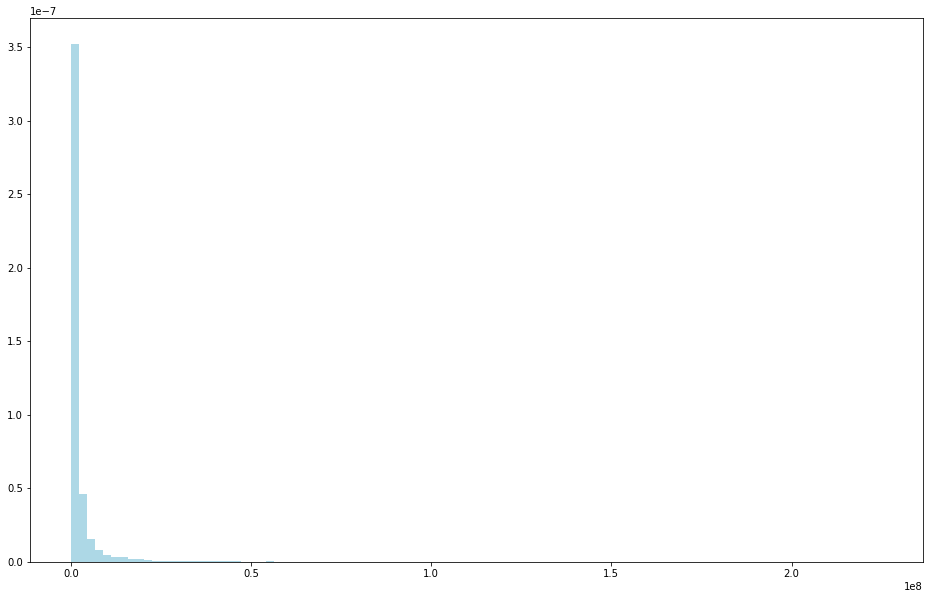

In [0]:
import matplotlib.pyplot as plt

targets = df_youtube.rdd.map(lambda x:float(x['views'])).collect()
#targets = df_youtube.filter(df_youtube.views < 20000000).rdd.map(lambda x:float(x['views'])).collect()


plt.hist(targets, bins=100, color='lightblue', density=True)
fig = plt.gcf()
fig.set_size_inches(16, 10) 

In [0]:
#show correlation between numeric columns

for i in df_youtube.columns[7:11]:
  for j in df_youtube.columns[7:11]:
    if i!=j : print(f'Correlation between  {i} and {j} : %g' % df_youtube.stat.corr(i,j))

Correlation between  views and likes : 0.851442
Correlation between  views and dislikes : 0.474106
Correlation between  views and comment_count : 0.621245
Correlation between  likes and views : 0.851442
Correlation between  likes and dislikes : 0.449287
Correlation between  likes and comment_count : 0.804596
Correlation between  dislikes and views : 0.474106
Correlation between  dislikes and likes : 0.449287
Correlation between  dislikes and comment_count : 0.700965
Correlation between  comment_count and views : 0.621245
Correlation between  comment_count and likes : 0.804596
Correlation between  comment_count and dislikes : 0.700965


In [0]:
from pyspark.mllib.stat import Statistics
import pandas as pd

#We can also compute the correlation matrix and show the heatmap for it

col_names = df_youtube.columns[7:11]
features = df_youtube.rdd.map(lambda row: row[7:11])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

print(corr_df.to_string())

                  views     likes  dislikes  comment_count
views          1.000000  0.849177  0.472213       0.617621
likes          0.849177  1.000000  0.447186       0.803057
dislikes       0.472213  0.447186  1.000000       0.700184
comment_count  0.617621  0.803057  0.700184       1.000000


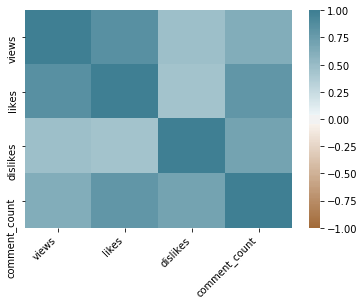

In [0]:
import seaborn as sns

ax = sns.heatmap(
    corr_df, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(40, 220, n=220)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

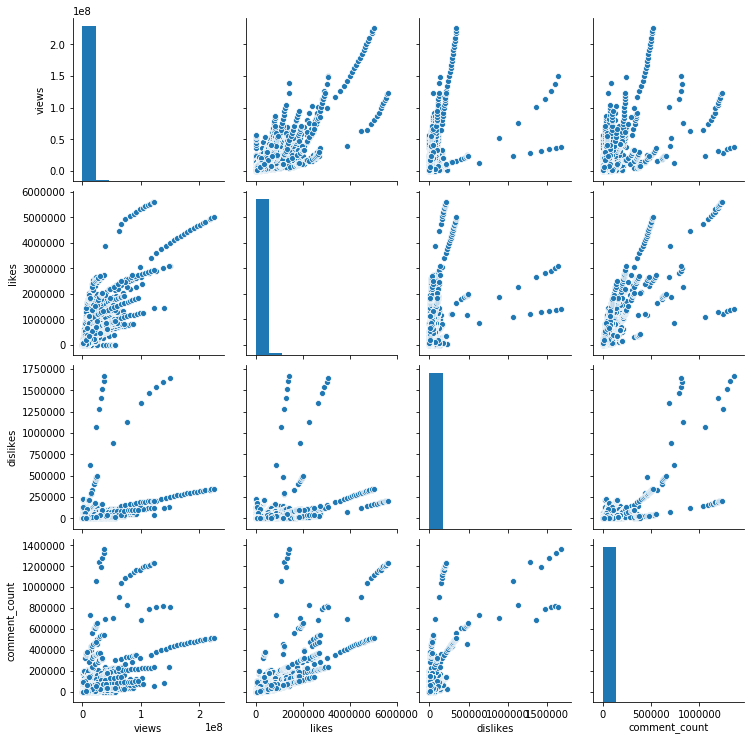

In [0]:
df = df_youtube.select(df_youtube.columns[7:11]).toPandas()
xs = sns.pairplot(df)

In [0]:
from pyspark.ml.feature import VectorAssembler

# Prepare data for linear regression
# For the prediction, we will only use the following variables : category_id, likes, dislikes, comment_count

vectorAssembler = VectorAssembler(inputCols = ['likes', 'dislikes', 'comment_count'], outputCol = 'features')
#vectorAssembler = VectorAssembler(inputCols = ['likes', 'comment_count'], outputCol = 'features')
vdf_youtube = vectorAssembler.transform(df_youtube)

#vdf_youtube.show(1000)

# The linear regression only needs 2 columns : 'features', which is the values of all the independent variables and the target var 'views' 
vdf_youtube = vdf_youtube.select(['features', 'views'])

In [0]:
vdf_youtube.show(5,False)

+-------------------------+-------+
|features                 |views  |
+-------------------------+-------+
|[57527.0,2966.0,15954.0] |748374 |
|[97185.0,6146.0,12703.0] |2418783|
|[146033.0,5339.0,8181.0] |3191434|
|[10172.0,666.0,2146.0]   |343168 |
|[132235.0,1989.0,17518.0]|2095731|
+-------------------------+-------+
only showing top 5 rows



In [0]:
# Split the data into training and testing set. We use 70% for training and 30% testing 

train_df, test_df = vdf_youtube.randomSplit([0.7, 0.3])
train_df.show(5)
test_df.show(5)

+---------+-----+
| features|views|
+---------+-----+
|(3,[],[])| 1456|
|(3,[],[])| 1873|
|(3,[],[])| 2005|
|(3,[],[])| 2259|
|(3,[],[])| 3921|
+---------+-----+
only showing top 5 rows

+---------+-----+
| features|views|
+---------+-----+
|(3,[],[])| 2093|
|(3,[],[])| 3560|
|(3,[],[])| 3780|
|(3,[],[])| 3831|
|(3,[],[])| 4050|
+---------+-----+
only showing top 5 rows



In [0]:
from pyspark.ml.regression import LinearRegression

# Train the model

lr = LinearRegression(featuresCol = 'features', labelCol='views', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [30.935169729342466,49.064801535878395,-44.098502199330774]
Intercept: 257378.5329388184


In [0]:
# show the model summary 

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


RMSE: 3528869.578279
r2: 0.772897


In [0]:
train_df.describe().show()

+-------+------------------+
|summary|             views|
+-------+------------------+
|  count|             28626|
|   mean|2353905.0793684064|
| stddev| 7405115.298274315|
|    min|               549|
|    max|         225211923|
+-------+------------------+



In [0]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","views","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="views",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-----------------+-----+---------+
|       prediction|views| features|
+-----------------+-----+---------+
|253447.8663563669| 2259|(3,[],[])|
|253447.8663563669| 4050|(3,[],[])|
|253447.8663563669|34794|(3,[],[])|
|253447.8663563669|36137|(3,[],[])|
|253447.8663563669|36931|(3,[],[])|
+-----------------+-----+---------+
only showing top 5 rows

R Squared (R2) on test data = 0.747501


In [0]:
# Predict on test data

test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 3.26273e+06


In [0]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 11
objectiveHistory: [0.5, 0.39086925936388534, 0.2355014094344722, 0.1845144819397343, 0.1627685243434732, 0.1509034715918898, 0.13841224849656164, 0.1313264682882462, 0.12291711743398838, 0.11627270934220198, 0.10934464042084545]
+------------------+
|         residuals|
+------------------+
|-251991.8663563669|
|-251574.8663563669|
|-251442.8663563669|
|-251354.8663563669|
|-249887.8663563669|
|-249667.8663563669|
|-249616.8663563669|
|-249526.8663563669|
|-238389.8663563669|
|-234114.8663563669|
|-230757.8663563669|
|-223459.8663563669|
|-220435.8663563669|
|-219240.8663563669|
|-217617.8663563669|
|-216868.8663563669|
|-216518.8663563669|
|-216264.8663563669|
|-216101.8663563669|
|-193841.8663563669|
+------------------+
only showing top 20 rows



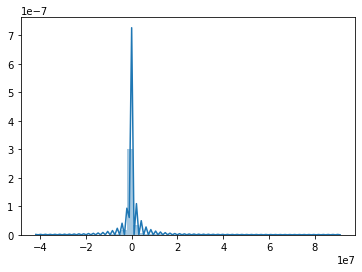

In [0]:
res1 = trainingSummary.residuals.toPandas()
ax = sns.distplot(res1)

In [0]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","views","features").show()

+------------------+--------+--------------+
|        prediction|   views|      features|
+------------------+--------+--------------+
| 253447.8663563669|    2259|     (3,[],[])|
| 253447.8663563669|    4050|     (3,[],[])|
| 253447.8663563669|   34794|     (3,[],[])|
| 253447.8663563669|   36137|     (3,[],[])|
| 253447.8663563669|   36931|     (3,[],[])|
| 253447.8663563669|   85833|     (3,[],[])|
| 253447.8663563669|   90365|     (3,[],[])|
| 253447.8663563669|  110404|     (3,[],[])|
| 253447.8663563669|  322521|     (3,[],[])|
| 253447.8663563669|  593311|     (3,[],[])|
| 253447.8663563669|  839375|     (3,[],[])|
| 253447.8663563669|  904517|     (3,[],[])|
| 253447.8663563669|  905268|     (3,[],[])|
| 253447.8663563669|  912549|     (3,[],[])|
| 253447.8663563669|  921077|     (3,[],[])|
| 253447.8663563669|  947039|     (3,[],[])|
| 253447.8663563669| 3511909|     (3,[],[])|
| 253447.8663563669|20921796|     (3,[],[])|
| 253447.8663563669|56111957|     (3,[],[])|
|252761.38